<a href="https://colab.research.google.com/github/Anikate-De/TensorFlow-Deep-Learning/blob/main/Transfer%20Learning%20on%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist as dataset

(X_train, y_train), (X_test, y_test) = dataset.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Text(0.5, 1.0, '4')

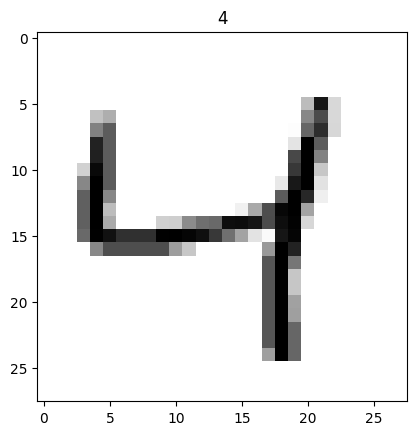

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_train[2], cmap = plt.cm.binary), 
plt.title(y_train[2])

In [4]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

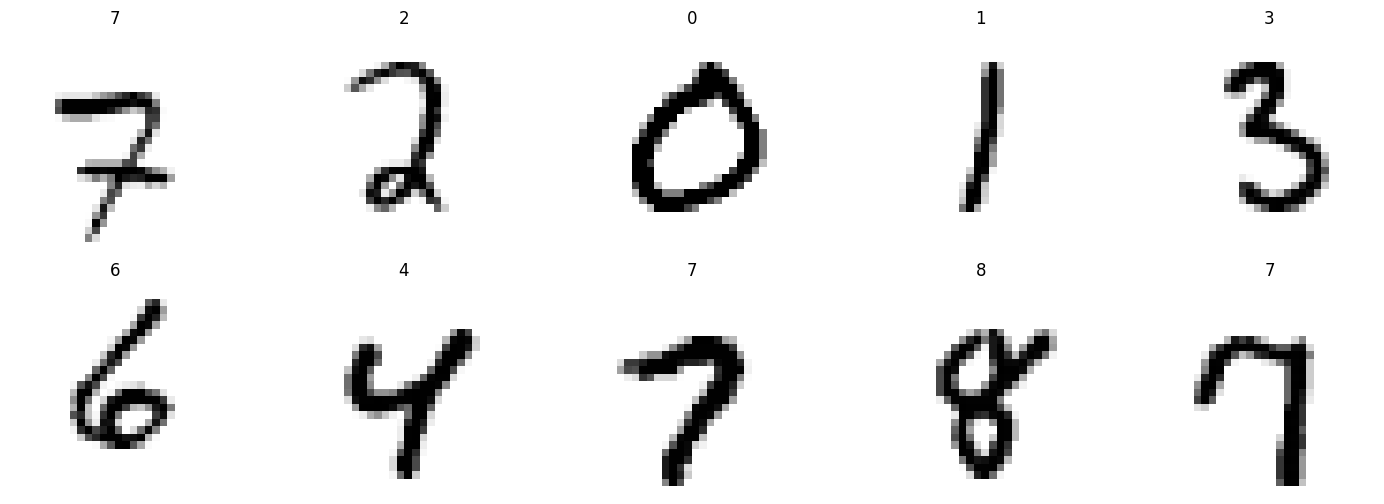

In [5]:
import random
plt.figure(figsize = (18, 6))

for i in range(10):
  ax = plt.subplot(2, 5, i+1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

In [19]:
X_train_norm, X_test_norm = X_train / 255.0, X_test / 255.0

In [20]:
import tensorflow_hub as hub

# Set random seed
tf.random.set_seed(4)

# Create the Model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (28, 28, 1)),
    hub.KerasLayer("https://tfhub.dev/tensorflow/tfgan/eval/mnist/logits/1",
                   trainable=False),
    tf.keras.layers.Dense(10, activation= 'softmax') 
])


In [21]:
# Compile the model
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [22]:
# Fit the model
history = model.fit(X_train_norm, y_train, epochs = 5, validation_data = (X_test_norm, y_test))

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.8768 - accuracy: 0.7984 - val_loss: 0.1324 - val_accuracy: 0.9755
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0913 - accuracy: 0.9825 - val_loss: 0.0652 - val_accuracy: 0.9849
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0534 - accuracy: 0.9873 - val_loss: 0.0466 - val_accuracy: 0.9877
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0399 - accuracy: 0.9899 - val_loss: 0.0383 - val_accuracy: 0.9887
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0337 - accuracy: 0.9909 - val_loss: 0.0352 - val_accuracy: 0.9888


<Axes: >

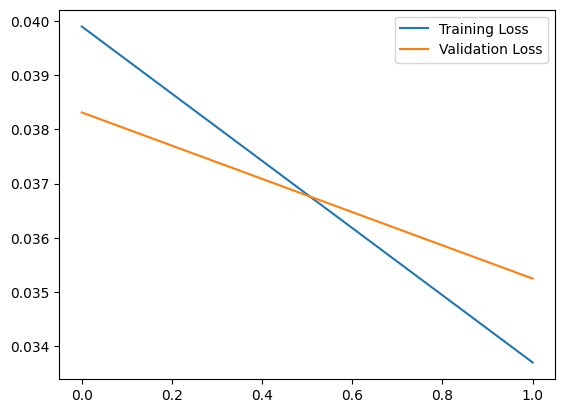

In [24]:
import pandas as pd

pd.DataFrame({'Training Loss': history.history['loss'][3:], 'Validation Loss' : history.history['val_loss'][3:]}).plot()

In [29]:
import itertools
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(y_true,
                          y_pred,
                          normalize = True,
                          figsize = (10, 10),
                          text_size = 15,
                          classes = None,
                          label_size = 20):
  """
  Plots a Confusion Matrix based on the Ground Truth and the predicted values.

  If `normalize` is set to True, the predicted values are rounded off to corresspond to singular class values
  """

  if normalize:
    y_pred = tf.round(y_pred)

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] # Normalize our Confusion Matrix

  n_classes = cm.shape[0]

  # Now, let's prettify the plotting
  fig, ax = plt.subplots(figsize = figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)

  # Show the Colorbar alongside
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title = 'Confusion Matrix',
        xlabel = 'Predicted Label',
        ylabel = 'True Label',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels
        )

  # Set Label Positions
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust Label Size
  ax.yaxis.label.set_size(label_size)
  ax.xaxis.label.set_size(label_size)

  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)',
            horizontalalignment = 'center',
            color = 'white' if cm[i, j] > threshold else 'black',
            size = text_size)

313/313 [==============================] - 1s 3ms/step


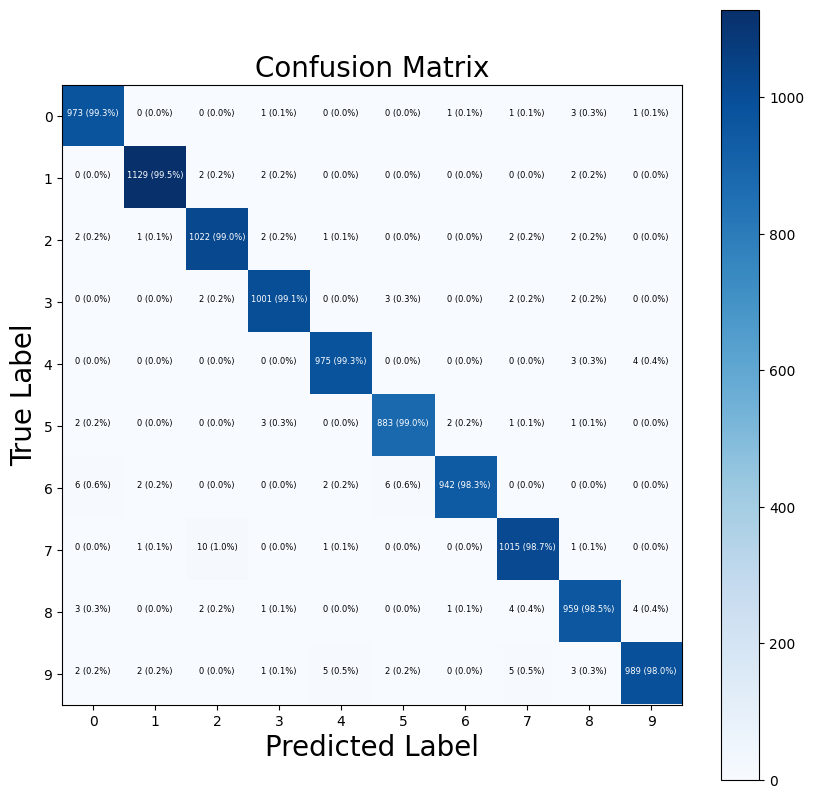

In [32]:
plot_confusion_matrix(y_true = y_test,
                      y_pred = model.predict(X_test_norm).argmax(axis = 1),
                      normalize = False,
                      classes = class_names,
                      text_size = 6)

In [71]:
import random

# Create a function to display a random set of images and the corressponding predictions by the model
def predict_random_images(model):
  plt.figure(figsize = (14, 6))

  for i in range(12):
    ax = plt.subplot(2, 6, i+1)
    rand_index = random.choice(range(len(X_train)))
    plt.imshow(X_train[rand_index], cmap = plt.cm.binary)

    prediction = model.predict(tf.expand_dims(X_train_norm[rand_index], axis = 0), verbose = 0)
    predicted_label = class_names[prediction.argmax()]
    if predicted_label == class_names[y_train[rand_index]]:
      color = 'green'
    else:
      color = 'red'
      
    ax.set_title(f'Prediction: {predicted_label}\nTrue: {class_names[y_train[rand_index]]}\nConfidence: {tf.reduce_max(prediction) * 100:2.0f}%', fontdict = {'color': color,})
    plt.axis(False)

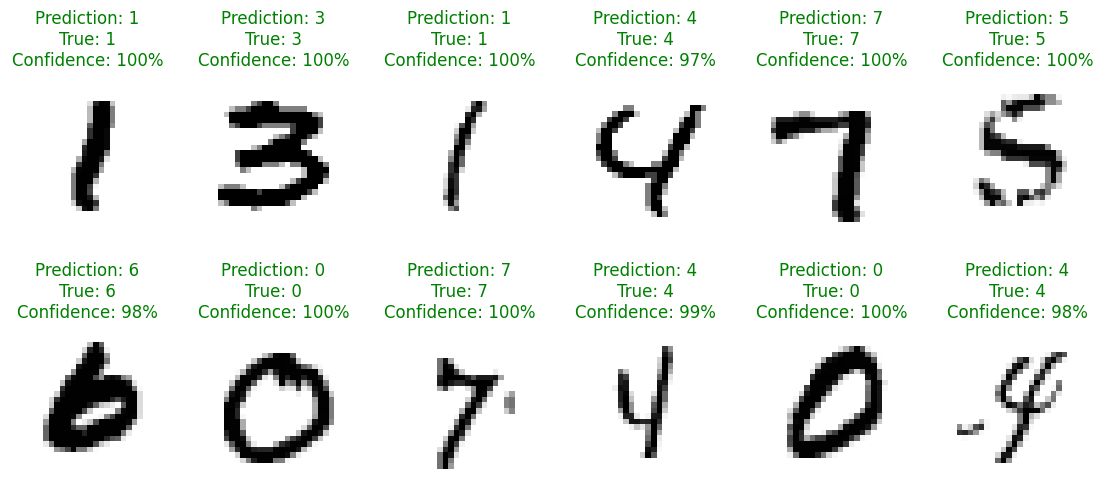

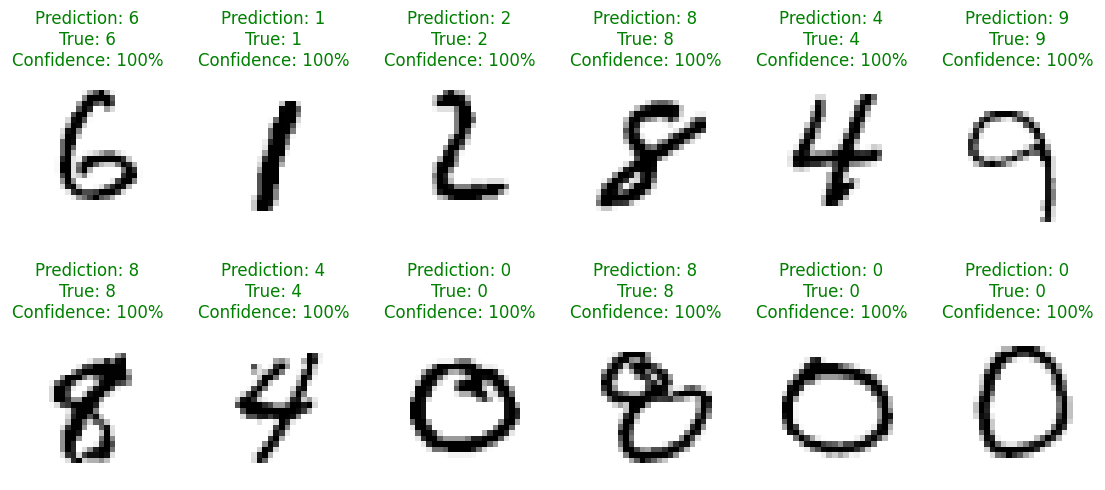

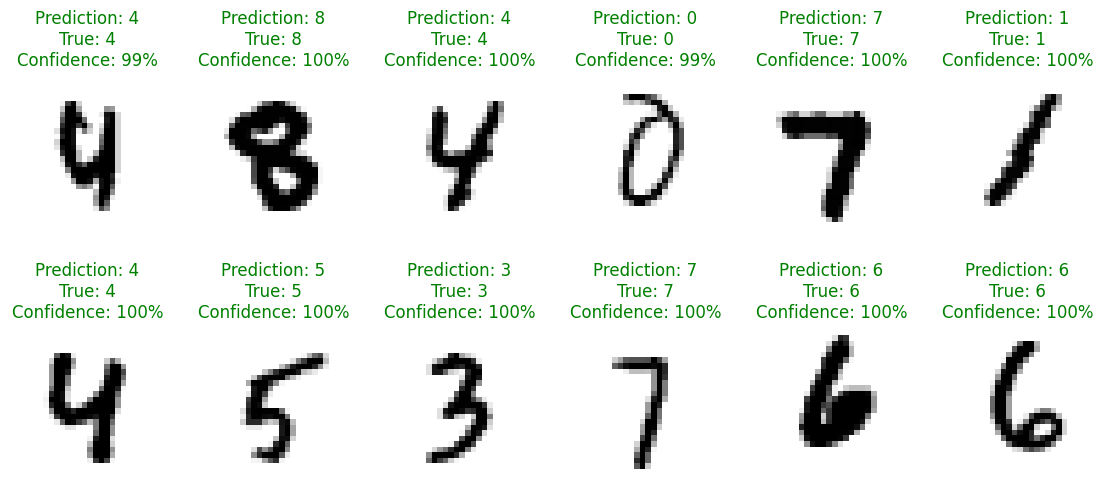

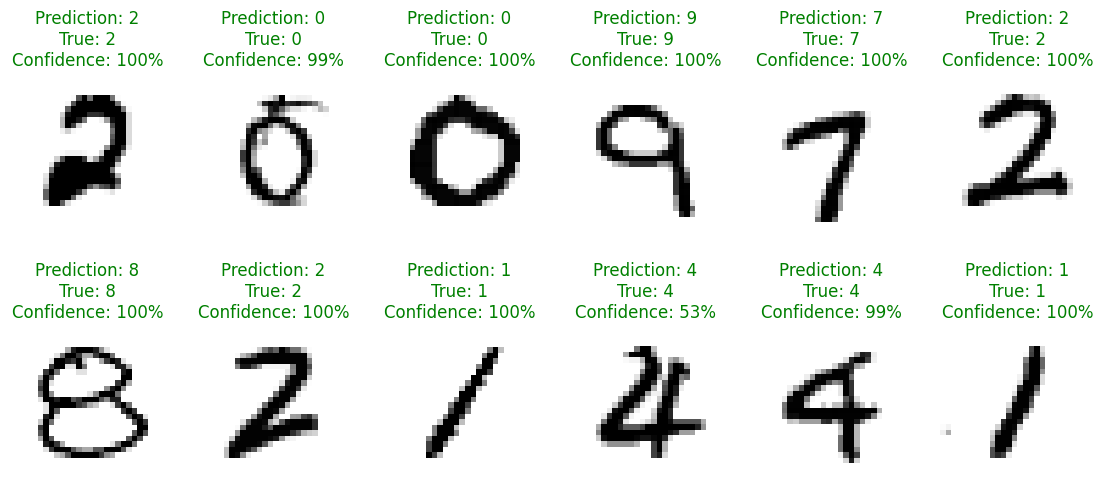

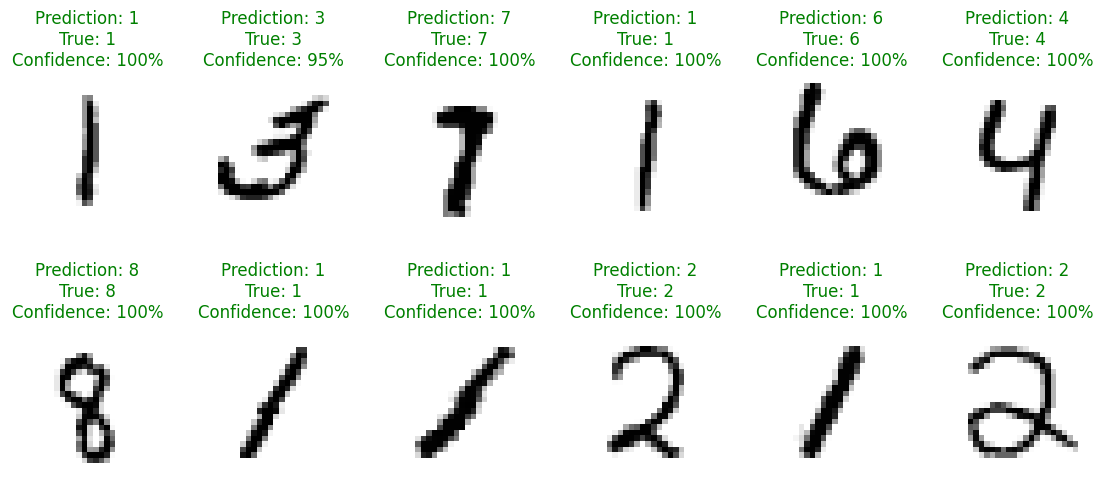

In [72]:
for i in range(5):
  predict_random_images(model)

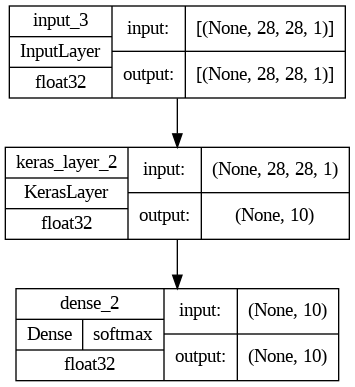

In [73]:
tf.keras.utils.plot_model(model,
                          show_shapes = True,
                          show_dtype = True,
                          show_layer_activations = True)

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 110
Trainable params: 110
Non-trainable params: 0
_________________________________________________________________
